In [ ]:
# General
import warnings
warnings.filterwarnings("ignore")
import datetime
from time import time
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# OpenCV
import cv2

# ScikitLearn for Data Splitting
from sklearn.model_selection import train_test_split, GroupKFold, StratifiedKFold

# Albumentations
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

# Pytorch
import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.ops import nms

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler

# Yolo
!pip install ultralytics
from ultralytics import YOLO

# Seed Everything for Reproducibility
SEED = 136

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(SEED)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.4/715.4 kB 8.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/dataset/'
os.listdir(DATA_PATH)

['nightTrain',
 'sample-dayClip6',
 'sample-nightClip1',
 'daySequence2',
 'Annotations',
 'dayTrain',
 'daySequence1',
 'nightSequence1',
 'nightSequence2',
 'train',
 'val',
 'test']

In [ ]:
DAY_TRAIN_PATH = '/content/drive/MyDrive/dataset/Annotations/Annotations/dayTrain/'
NIGHT_TRAIN_PATH = '/content/drive/MyDrive/dataset/Annotations/Annotations/nightTrain/'

In [ ]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 88.0MB/s]


# Pretrain the YOLO architecture
We pre-train the YOLO architecture and have an overall improved model and better training times.

In [ ]:
# Train the model
results = model.train(data='coco128.yaml', epochs=10, imgsz=640)

Ultralytics YOLOv8.1.16 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 6.66M/6.66M [00:00<00:00, 126MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 4352.00file/s]

Dataset download success ✅ (1.2s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 23.1MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 1712.73it/s]

train: New cache created: /content/datasets/coco128/labels/train2017.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.215      1.407      1.227         76        640: 100%|██████████| 8/8 [01:15<00:00,  9.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.16s/it]

                   all        128        929      0.664      0.507      0.588      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.139      1.328      1.208        101        640: 100%|██████████| 8/8 [01:09<00:00,  8.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.91s/it]

                   all        128        929       0.67      0.524      0.613      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       1.18      1.371      1.203        105        640: 100%|██████████| 8/8 [01:09<00:00,  8.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.99s/it]

                   all        128        929      0.682      0.569      0.633      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.155      1.283      1.185        101        640: 100%|██████████| 8/8 [01:09<00:00,  8.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.23s/it]

                   all        128        929      0.677      0.585      0.645      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.122      1.261      1.177         52        640: 100%|██████████| 8/8 [01:10<00:00,  8.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.12s/it]

                   all        128        929      0.692      0.609      0.663      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.118       1.25      1.171         94        640: 100%|██████████| 8/8 [01:10<00:00,  8.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.10s/it]

                   all        128        929      0.674      0.621       0.67      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.123      1.226      1.176        196        640: 100%|██████████| 8/8 [01:09<00:00,  8.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.10s/it]

                   all        128        929      0.693      0.628      0.681      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.097      1.143      1.165        149        640: 100%|██████████| 8/8 [01:09<00:00,  8.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.01s/it]

                   all        128        929      0.708      0.625       0.69      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.137      1.191      1.155        103        640: 100%|██████████| 8/8 [01:10<00:00,  8.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:24<00:00,  6.15s/it]

                   all        128        929      0.717      0.622      0.696      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G       1.13      1.196      1.186        106        640: 100%|██████████| 8/8 [01:10<00:00,  8.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:28<00:00,  7.06s/it]

                   all        128        929      0.716      0.625      0.695      0.521



10 epochs completed in 0.267 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.16 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD EPYC 7B12)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.84s/it]


                   all        128        929      0.717      0.625      0.694       0.52
                person        128        254      0.849      0.642      0.775      0.566
               bicycle        128          6      0.904      0.333      0.367      0.322
                   car        128         46      0.702      0.217      0.318      0.192
            motorcycle        128          5      0.814      0.882      0.962      0.803
              airplane        128          6      0.816          1      0.972      0.825
                   bus        128          7          1      0.663      0.724      0.644
                 train        128          3      0.639          1      0.995      0.852
                 truck        128         12      0.801      0.417       0.51      0.394
                  boat        128          6      0.631      0.333      0.648       0.42
         traffic light        128         14      0.574      0.196      0.191      0.145
             stop sig

In [ ]:
train_day = []
for clipName in tqdm(sorted(os.listdir(DAY_TRAIN_PATH))):
    if 'dayClip' not in clipName:
        continue
    df = pd.read_csv(os.path.join(DAY_TRAIN_PATH,clipName,'frameAnnotationsBOX.csv'),sep=';')
    train_day.append(df)

train_day_df = pd.concat(train_day,axis=0)
train_day_df['isNight'] = 0

train_night = []
for clipName in tqdm(sorted(os.listdir(NIGHT_TRAIN_PATH))):
    if 'nightClip' not in clipName:
        continue
    df = pd.read_csv(os.path.join(NIGHT_TRAIN_PATH,clipName,'frameAnnotationsBOX.csv'),sep=';')
    train_night.append(df)

train_night_df = pd.concat(train_night,axis=0)
train_night_df['isNight'] = 1

df = pd.concat([train_day_df,train_night_df],axis=0)

100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


In [ ]:
df.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin file,Origin frame number,Origin track,Origin track frame number,isNight
0,dayTraining/dayClip1--00000.jpg,go,698,333,710,358,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,0
1,dayTraining/dayClip1--00000.jpg,go,846,391,858,411,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,0,0
2,dayTraining/dayClip1--00001.jpg,go,698,337,710,357,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,0
3,dayTraining/dayClip1--00001.jpg,go,847,390,859,410,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,1,0
4,dayTraining/dayClip1--00002.jpg,go,698,331,710,356,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,2,dayTraining/dayClip1/dayClip1Shutter0.000800-G...,2,0


In [ ]:
# Duplicate Columns
np.all(df['Origin file'] == df['Origin track']), np.all(df['Origin frame number'] == df['Origin track frame number'])

(True, True)

In [ ]:
# Droppin duplicate columns & "Origin file" as we don't need it
df = df.drop(['Origin file','Origin track','Origin track frame number'],axis=1)

In [ ]:
def changeFilename(x):
    filename = x.Filename
    isNight = x.isNight

    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
    if isNight:
        return os.path.join(DATA_PATH,f'nightTrain/nightTrain/{clipName}/frames/{splitted[-1]}')
    else:
        return os.path.join(DATA_PATH,f'dayTrain/dayTrain/{clipName}/frames/{splitted[-1]}')

df['Filename'] = df.apply(changeFilename,axis=1)

In [ ]:
df['Annotation tag'].unique()

array(['go', 'stop', 'stopLeft', 'warning', 'goLeft', 'warningLeft'], dtype=object)

In [ ]:
# We will change annotations to only -> stop (RED), go (GREEN) & warning (YELLOW)
label_to_idx = {'go':0, 'warning':1, 'stop': 2}
idx_to_label = {v:k for k,v in label_to_idx.items()}

def changeAnnotation(x):
    if 'go' in x['Annotation tag']:
        return label_to_idx['go']
    elif 'warning' in x['Annotation tag']:
        return label_to_idx['warning']
    elif 'stop' in x['Annotation tag']:
        return label_to_idx['stop']

df['Annotation tag'] = df.apply(changeAnnotation,axis=1)

annotation_tags = df['Annotation tag'].unique()
annotation_tags

array([0, 2, 1])

In [ ]:
df.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isNight
0,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,333,710,358,0,0
1,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,846,391,858,411,0,0
2,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,337,710,357,1,0
3,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,847,390,859,410,1,0
4,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,331,710,356,2,0


In [ ]:
# Changing Column Names
df.columns = ['image_id','label','x_min','y_min','x_max','y_max','frame','isNight']

In [ ]:
df.head()

,image_id,label,x_min,y_min,x_max,y_max,frame,isNight
0,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,333,710,358,0,0
1,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,846,391,858,411,0,0
2,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,337,710,357,1,0
3,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,847,390,859,410,1,0
4,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,331,710,356,2,0


In [ ]:
print("Number of Unique Images: ",df.image_id.nunique(),'/',df.shape[0])

Number of Unique Images:  18013 / 51826


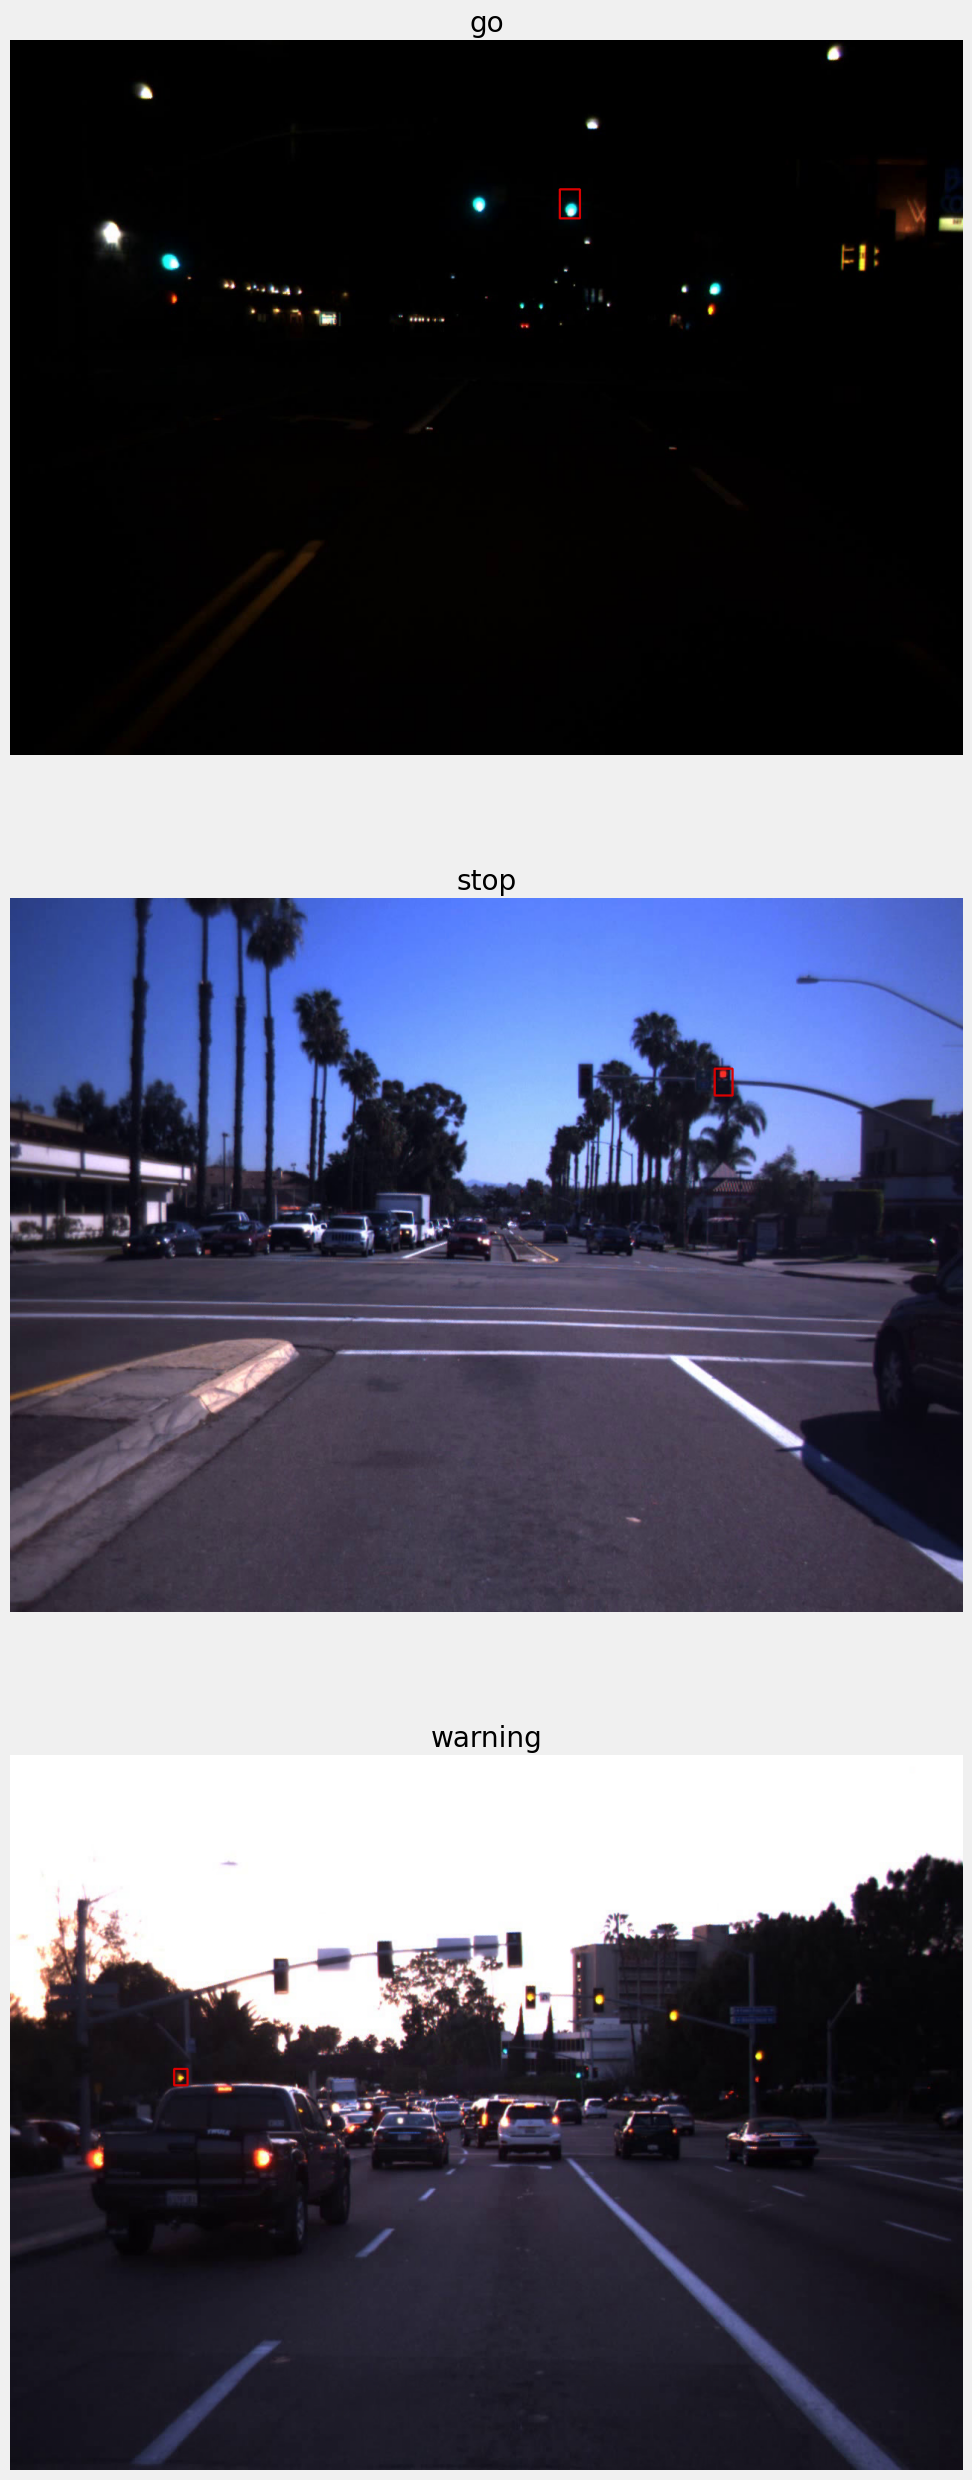

In [ ]:
fig, ax = plt.subplots(len(annotation_tags),1,figsize=(15,10*len(annotation_tags)))

for i, tag in enumerate(annotation_tags):
    sample = df[df['label']==tag].sample(1)
    bbox = sample[['x_min','y_min','x_max','y_max']].values[0]

    image = cv2.imread(sample.image_id.values[0])
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    cv2.rectangle(image,(bbox[0],bbox[1]),(bbox[2],bbox[3]),(220, 0, 0), 2)

    ax[i].set_title(idx_to_label[tag])
    ax[i].set_axis_off()
    ax[i].imshow(image)

In [ ]:
def extract_clip_name(image_path):
    parts = image_path.split('/')
    for part in parts:
        if 'Clip' in part:
            return part.split('--')[0]

df['clipNames'] = df['image_id'].apply(extract_clip_name)
print(df['clipNames'].unique())

['dayClip1' 'dayClip10' 'dayClip11' 'dayClip12' 'dayClip13' 'dayClip2' 'dayClip3' 'dayClip4' 'dayClip5' 'dayClip6' 'dayClip7' 'dayClip8' 'dayClip9' 'nightClip1' 'nightClip2' 'nightClip3' 'nightClip4' 'nightClip5']


In [ ]:
def split(df,p=0.25):
    clipNames = sorted(df['clipNames'].unique())

    nightClips = [name for name in clipNames if 'night' in name]
    dayClips = [name for name in clipNames if 'day' in name]

    testNightClipNames = list(np.random.choice(nightClips,int(len(nightClips)*p)))
    testDayClipNames = list(np.random.choice(dayClips,int(len(dayClips)*p)))
    testClipNames = testNightClipNames + testDayClipNames

    trainDayClipNames = list(set(dayClips) - set(testDayClipNames))
    trainNightClipNames = list(set(nightClips) - set(testNightClipNames))
    trainClipNames = trainNightClipNames + trainDayClipNames

    train_df = df[df.clipNames.isin(trainClipNames)]
    test_df = df[df.clipNames.isin(testClipNames)]

    return train_df, test_df

In [ ]:
train_df, test_df = split(df)

In [ ]:
train_df.head()

,image_id,label,x_min,y_min,x_max,y_max,frame,isNight,clipNames
0,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,323,288,335,308,0,0,dayClip10
1,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,506,376,518,396,0,0,dayClip10
2,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,587,369,599,389,0,0,dayClip10
3,/content/drive/MyDrive/dataset/dayTrain/dayTra...,2,210,261,222,279,0,0,dayClip10
4,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,330,286,342,306,1,0,dayClip10


In [ ]:
test_df.head()

,image_id,label,x_min,y_min,x_max,y_max,frame,isNight,clipNames
0,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,333,710,358,0,0,dayClip1
1,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,846,391,858,411,0,0,dayClip1
2,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,337,710,357,1,0,dayClip1
3,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,847,390,859,410,1,0,dayClip1
4,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,698,331,710,356,2,0,dayClip1


In [ ]:
print("Train shape: ",train_df.shape)
print("Test shape: ",test_df.shape)

Train shape:  (38199, 9)
Test shape:  (13627, 9)


In [ ]:
train_df, val_df = split(train_df)
train_df.head()

,image_id,label,x_min,y_min,x_max,y_max,frame,isNight,clipNames
0,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,323,288,335,308,0,0,dayClip10
1,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,506,376,518,396,0,0,dayClip10
2,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,587,369,599,389,0,0,dayClip10
3,/content/drive/MyDrive/dataset/dayTrain/dayTra...,2,210,261,222,279,0,0,dayClip10
4,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,330,286,342,306,1,0,dayClip10


In [ ]:
val_df.head()

,image_id,label,x_min,y_min,x_max,y_max,frame,isNight,clipNames
0,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,271,379,283,399,0,0,dayClip12
1,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,610,294,625,314,0,0,dayClip12
2,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,774,359,792,394,0,0,dayClip12
3,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,266,364,284,404,1,0,dayClip12
4,/content/drive/MyDrive/dataset/dayTrain/dayTra...,0,609,293,627,313,1,0,dayClip12


In [ ]:
print("Train shape: ",train_df.shape)
print("Validation shape: ",val_df.shape)

Train shape:  (33457, 9)
Validation shape:  (4742, 9)


In [ ]:
EPOCHS = 3
BATCH_SIZE = 16

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [ ]:
import shutil
from tqdm import tqdm

os.makedirs(os.path.join(DATA_PATH, "train/images"), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, "val/images"), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, "test/images"), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, "train/labels"), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, "val/labels"), exist_ok=True)


def compute_bounding_box_center(x_min, y_min, x_max, y_max):
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    return x_center, y_center, width, height

def copy_images_and_labels(df, dataset_type):
    total_items = len(df)
    with tqdm(total=total_items, desc=f"Copying {dataset_type} data") as pbar:
        for i, row in df.iterrows():
            image_id = row['image_id']
            label = row['label']
            x_min, y_min, x_max, y_max = row['x_min'], row['y_min'], row['x_max'], row['y_max']

            image_dest = os.path.join(DATA_PATH, f"{dataset_type}/images", f"{image_id}")
            label_dest = os.path.join(DATA_PATH, f"{dataset_type}/labels", f"{image_id}.txt")

            if not os.path.exists(image_dest) or not os.path.samefile(image_id, image_dest):
              shutil.copy(image_id, image_dest)

            with open(label_dest, 'w') as f:
                x_center, y_center, width, height = compute_bounding_box_center(x_min, y_min, x_max, y_max)
                f.write(f"{label},{x_center},{y_center},{width},{height}\n")

            pbar.update(1)

copy_images_and_labels(train_df, "train")
copy_images_and_labels(val_df, "val")
copy_images_and_labels(test_df, "test")

Copying test data: 100%|██████████| 13627/13627 [02:11<00:00, 103.53it/s]


In [ ]:
class TrafficLightsDataset:
    def __init__(self, df, transforms=None):
        super().__init__()

        # Image_ids will be the "Filename" here
        self.image_ids = df.image_id.unique()
        self.df = df
        self.transforms = transforms

    def __len__(self) -> int:
        return self.image_ids.shape[0]

    def __getitem__(self, index: int):

        image_id = self.image_ids[index]
        records = self.df[self.df.image_id == image_id]

        # Reading Image
        image = cv2.imread(image_id)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0

        # Bounding Boxes
        boxes = records[['x_min','y_min','x_max','y_max']].values
        boxes = torch.as_tensor(boxes,dtype=torch.float32)

        # Area of the bounding boxes
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = torch.as_tensor(area, dtype=torch.float32)

        # Labels of the object detected
        labels = torch.as_tensor(records.label.values, dtype=torch.int64)

        iscrowd = torch.zeros_like(labels, dtype=torch.int64)

        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd


        if self.transforms:
            sample = {
                'image': image,
                'bboxes': target['boxes'],
                'labels': labels
            }
            sample = self.transforms(**sample)
            image = sample['image']

            # target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1, 0)
            target['boxes'] = torch.as_tensor(sample['bboxes'],dtype=torch.float32)
            target['labels'] = torch.as_tensor(sample['labels'])

        return image, target, image_id

In [ ]:
# Average loss -> (Total-Loss / Total-Iterations)
class LossAverager:
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
# Albumentations

# For Train Data
def getTrainTransform():
    return A.Compose([
        A.Resize(height=512, width=512, p=1),
        A.Flip(0.5),
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

# For Validation Data
def getValTransform():
    return A.Compose([
        A.Resize(height=512, width=512, p=1),
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

# For Test Data
def getTestTransform():
    return A.Compose([
        A.Resize(height=512, width=512, p=1),
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [ ]:
trainDataset = TrafficLightsDataset(train_df,getTrainTransform())
valDataset = TrafficLightsDataset(val_df,getValTransform())
testDataset = TrafficLightsDataset(test_df,getTestTransform())

In [ ]:
!pip install pyyaml

In [ ]:
import yaml

train_path = "/content/drive/MyDrive/dataset/train/images"
val_path = "/content/drive/MyDrive/dataset/val/images"
test_path = "/content/drive/MyDrive/dataset/test/images"
train_labels = "/content/drive/MyDrive/dataset/train/labels/labels.csv"
val_labels = "/content/drive/MyDrive/dataset/val/labels/labels.csv"

class_names = {
    0: "go",
    1: "warning",
    2: "stop"
}

data = {
    "train": {
        "path": train_path,
        "labels": train_labels
    },
    "val": {
        "path": val_path,
        "labels": val_labels
    },
    "test": {
        "path": test_path
    },
    "names": class_names
}

with open("dataset.yaml", "w") as f:
    yaml.dump(data, f)


In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
current_yaml_path = "/content/dataset.yaml"

destination_directory = "/content/datasets/"

shutil.move(current_yaml_path, destination_directory)

In [ ]:
training_settings = {
    'data': '/content/datasets',  # Path to your custom dataset configuration file
    'epochs': 100,  # Total number of training epochs
    'imgsz': 640,  # Target image size for training
    # Add other training settings as needed
}

In [ ]:
training_settings['save'] = True
training_settings['save_period'] = 10  # Save checkpoints every 10 epochs

In [ ]:
# Start training the model
training_results = model.train(**training_settings)